In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
from __future__ import print_function

import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# from deepviz.guided_backprop import GuidedBackprop
# from sklearn.cross_validation import train_test_split
from sklearn.metrics.ranking import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from deepviz.guided_backprop import GuidedBackprop

try:
    import keras

    import keras.backend as K
    from keras.models import Sequential
    from keras.layers import Dense, Dropout, Activation
    from keras.optimizers import RMSprop
    from keras.optimizers import Adam
    from keras.optimizers import Adagrad
    from keras.optimizers import SGD
    from keras.callbacks import LambdaCallback, ReduceLROnPlateau, ModelCheckpoint
    from keras.layers.core import Lambda
    from keras.losses import categorical_crossentropy
    import tensorflow as tf
    from keras import regularizers

except:
    print("Keras not found")
    
np.random.seed(42)


def my_basename(path):
    return os.path.splitext(os.path.split(path)[1])[0]

file_dir=r'C:/Users/Mark.Rademaker/PycharmProjects/InternshipNaturalis/venv/github_trait_geo_diverse_dl/trait-geo-diverse-dl'

651
811
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_106 (Dense)            (None, 50)                2100      
_________________________________________________________________
dropout_65 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_107 (Dense)            (None, 25)                1275      
_________________________________________________________________
dropout_66 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_108 (Dense)            (None, 25)                650       
_________________________________________________________________
dropout_67 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_109 (Dense)            (None, 25)                650       
__

1242/1242 [==============================] - 0s 27us/step - loss: 0.3691 - acc: 0.8390 - val_loss: 0.3870 - val_acc: 0.8136
Epoch 49/125
1242/1242 [==============================] - 0s 27us/step - loss: 0.3779 - acc: 0.8422 - val_loss: 0.3799 - val_acc: 0.8227
Epoch 50/125
1242/1242 [==============================] - 0s 26us/step - loss: 0.3559 - acc: 0.8430 - val_loss: 0.3830 - val_acc: 0.8227
Epoch 51/125
1242/1242 [==============================] - 0s 26us/step - loss: 0.3803 - acc: 0.8422 - val_loss: 0.3887 - val_acc: 0.8273
Epoch 52/125
1242/1242 [==============================] - 0s 26us/step - loss: 0.3703 - acc: 0.8422 - val_loss: 0.3880 - val_acc: 0.8273
Epoch 53/125
1242/1242 [==============================] - 0s 26us/step - loss: 0.3546 - acc: 0.8535 - val_loss: 0.3854 - val_acc: 0.8227
Epoch 54/125
1242/1242 [==============================] - 0s 26us/step - loss: 0.3670 - acc: 0.8462 - val_loss: 0.3904 - val_acc: 0.8273
Epoch 55/125
1242/1242 [==============================

Epoch 108/125
1242/1242 [==============================] - 0s 26us/step - loss: 0.3264 - acc: 0.8607 - val_loss: 0.3764 - val_acc: 0.8364
Epoch 109/125
1242/1242 [==============================] - 0s 26us/step - loss: 0.3236 - acc: 0.8623 - val_loss: 0.3728 - val_acc: 0.8318
Epoch 110/125
1242/1242 [==============================] - 0s 26us/step - loss: 0.3107 - acc: 0.8776 - val_loss: 0.3696 - val_acc: 0.8364
Epoch 111/125
1242/1242 [==============================] - 0s 26us/step - loss: 0.3032 - acc: 0.8663 - val_loss: 0.3804 - val_acc: 0.8364
Epoch 112/125
1242/1242 [==============================] - 0s 26us/step - loss: 0.3213 - acc: 0.8688 - val_loss: 0.3880 - val_acc: 0.8318
Epoch 113/125
1242/1242 [==============================] - 0s 26us/step - loss: 0.3088 - acc: 0.8631 - val_loss: 0.3800 - val_acc: 0.8273
Epoch 114/125
1242/1242 [==============================] - 0s 26us/step - loss: 0.3399 - acc: 0.8599 - val_loss: 0.3818 - val_acc: 0.8273
Epoch 115/125
1242/1242 [=========

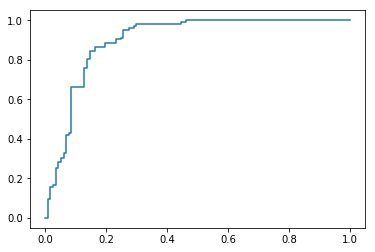

INFO:tensorflow:Restoring parameters from /tmp/guided_backprop_ckpt
(220, 41)
Precipitation_Driest_Quarter
['Mean_Temp_Warmest_Quarter' 'Isothermality' 'Min_Temp_Coldest_Month'
 'Aridity_Index_Thornthwaite' 'Precipitation_Wettest_Quarter'
 'Precipitation_Wettest_Month' 'Mean_Temp_Driest_Quarter'
 'Max_Temp_Coldest' 'Moisture_Index' 'Precipitation_Warmest_Quarter'
 'PET_Seasonality' 'Aspect' 'PhCaCL' 'Slope' 'Annual_Mean_Temperature'
 'Growing_Deg_Days0' 'Month_Count_by_Temp' 'Thermicity_Index'
 'Bulk_Density' 'Precipitation_Seasonality'
 'Precipitation_Coldest_Quarter' 'Mean_Temp_Wettest_Quarter'
 'Organic_Carbon' 'Temperature_Seasonality' 'Min_Temp_Warmest'
 'Mean_Diurnal_Temp_Range' 'Emberger_Q' 'Clay_Percentage'
 'PET_Wettest_Quarter' 'PET_Driest_Quarter' 'PET_Coldest_Quarter'
 'Growing_Deg_Days5' 'Annual_Precipitation' 'PET_Warmest_Quarter'
 'Continentality' 'Temp_Annual_Range' 'Mean_Temp_Coldest_Quarter'
 'Max_Temp_Warmest_Month' 'Precipitation_Driest_Month' 'Annual_PET'
 'Precipi

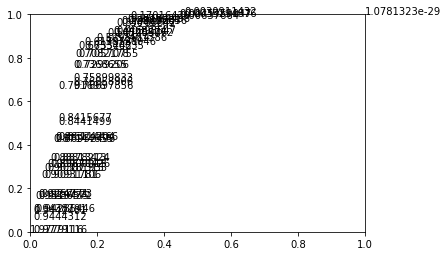

In [26]:
def main():
    table = pd.read_csv(file_dir +"/data/capriolus_trial/Capriolus_capriolus_env_dataframe.csv")
    table =table.loc[:1500]
    # at 40 degrees latitude
    bin_size_km = 5
    one_degree_latitude_km = 111.03  # http://www.longitudestore.com/how-big-is-one-gps-degree.html
    one_degree_longitude_km = 85.39
    step_latitude = 1. / one_degree_latitude_km * bin_size_km
    step_longitude = 1. / one_degree_longitude_km * bin_size_km
    # print("step_latitude, step_longitude", step_latitude, step_longitude)

    # remove spaces from column names
    for column in table.columns:
        table[column.strip()] = table[column]
        if column.strip() != column:
            del table[column]
    # print(table.columns)
    # print(table.decimal_latitude.min(), table.decimal_latitude.max())

    latitude_min = table.decimal_latitude.min()
    longitude_min = table.decimal_longitude.min()
    table.decimal_latitude = table.decimal_latitude.apply(lambda x: (x - latitude_min) // step_latitude)
    table.decimal_longitude = table.decimal_longitude.apply(lambda x: (x - longitude_min) // step_longitude)
    table.decimal_latitude = table.decimal_latitude.astype(int)
    table.decimal_longitude = table.decimal_longitude.astype(int)

    # make feature vector
    band_columns = [column for column in table.columns[8:]]
    X = []
    y = []
    for _, row in table.iterrows():
        x = row[band_columns].values
        if (np.any(x <= -9999.0)):  # in sea?
            continue
        # print(row["present/pseudo_absent"], np.where(x <= -9999.0)[0])
        x = x.tolist()
        x.append(row["present/pseudo_absent"])
        X.append(x)

    df = pd.DataFrame(data=X, columns=band_columns + ["presence"])
    df.to_csv("filtered.csv", index=None)

    print(len(df[df["presence" ]==1]))
    print(len(df[df["presence" ]==0]))

    # Scale feature values
    for column in df.columns[:-1]:
        # if "band" in column:
        std_dev = np.std(df[column])
        mean_ = np.mean(df[column])
        df[column] = df[column].apply(lambda x: (x - mean_) / std_dev)
    df.to_csv("normalized.csv", index=None)

    X = []
    y = []
    band_columns = [column for column in df.columns[:-1]]
    # print(band_columns)

    for _, row in df.iterrows():
        X.append(row[band_columns].values.tolist())
        y.append([1 - row["presence"], row["presence"]])

    X = np.vstack(X)
    y = np.vstack(y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

    batch_size = 75
    num_classes = 2
    epochs = 125
    
    num_inputs = X.shape[1]  # number of features

    #reducelr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-8,
     #                                     verbose=1)
    
    model = Sequential()
    layer_1 = Dense(50, activation='relu',input_shape=(num_inputs,))#, kernel_regularizer=regularizers.l1(0.000001))

    layer_2 = Dense(25, activation='relu', input_shape=(num_inputs,))#, kernel_regularizer=regularizers.l1(0.000001))
    layer_3 = Dense(25, activation='relu', input_shape=(num_inputs,))#, kernel_regularizer=regularizers.l1(0.0000001))
    layer_4 = Dense(25, activation='relu', input_shape=(num_inputs,))#, kernel_regularizer=regularizers.l1(0.00000001))
    
    
    model.add(layer_1)
    model.add(Dropout(0.3))
    model.add(layer_2)
    model.add(Dropout(0.5))
    model.add(layer_3)
    model.add(Dropout(0.3))
    model.add(layer_4)
    model.add(Dropout(0.5))
  
    
    
    # model.add(Lambda(lambda x: K.dropout(x, level=0.5)))
    # model.add(Dense(512, activation='relu',
    #             # kernel_regularizer=regularizers.l2(0.01),
    #             # activity_regularizer=regularizers.l1(0.01)
    #                 ))
    # model.add(Dropout(0.5))
    # model.add(Lambda(lambda x: K.dropout(x, level=0.5)))
    out_layer = Dense(num_classes, activation=None)
    model.add(out_layer)
    model.add(Activation("softmax"))

    model.summary()

    model.compile(loss="categorical_crossentropy",
                # optimizer =SGD(lr=0.001, momentum =0.9, nesterov=True),
                # optimizer=Adagrad(lr=0.001),
                # optimizer=RMSprop(lr=0.001),# rho=0.9, epsilon=1e-08, decay=0.0),
                optimizer=Adam(lr=0.001),#, rho=0.9, epsilon=1e-08, decay=0.0),
                metrics =['accuracy'])

    history = model.fit(X_train, y_train,
    batch_size =batch_size,
    epochs =epochs,
    verbose =1,
    validation_data =(X_test, y_test),
    callbacks =[],
    shuffle =True,
    class_weight ={
        0: 1,
        1: 1,
    }
    )

    score = model.evaluate(X_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    predictions = model.predict(X_test)
    print("AUC", roc_auc_score(y_test[:, 1], predictions[:, 1]))
    fpr, tpr, thresholds = roc_curve(y_test[:, 1], predictions[:, 1])
    plt.plot(fpr, tpr)
    plt.show()
    
    guided_bprop = GuidedBackprop(model)
    #mask = guided_bprop.get_mask(X_test[0])
    masks = []
    for i in range(X_test.shape[0]):
        masks.append(guided_bprop.get_mask(X_test[i]))
        #print(masks[-1].shape)
    print(np.vstack(masks).shape)
    mask = np.mean(np.vstack(masks), axis=0)
    print(band_columns[mask.argmax()])
    print(np.array(band_columns)[mask.argsort()])
    
    for i, xy in enumerate(zip(fpr, tpr)):
        plt.gca().annotate(str(thresholds[i]), xy=xy, textcoords='data')

    plt.show()


if __name__ == "__main__":
    main()


